In [0]:
#                                                                          Neural network with 1 layer of 10 softmax neurons

# X -- [minibatch_size, 784]    (784 = 28 * 28)
# W -- [784, 10]
# b -- [10]
# Z1 -- [minibatch_size, 10]

# Model:
#
# Z1 = softmax(X * W + b)
#              X: matrix for minibatch_size grayscale images of 28x28 pixels, flattened (there are minibatch_size images in a mini-batch)
#              W: weight matrix with 784 lines and 10 columns
#              b: bias vector with 10 dimensions
#              +: add with broadcasting: adds the vector to each line of the matrix (numpy)
#              softmax(matrix) applies softmax on each line
#              softmax(line) applies an exp to each value then divides by the norm of the resulting line
#              Z1: output matrix with minibatch_size lines and 10 columns

In [0]:
# Import libraries
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops

In [3]:
# Load mnist dataset
from tensorflow.examples.tutorials.mnist import input_data as mnist_data
mnist = mnist_data.read_data_sets("data", one_hot = True, reshape = True)

print("\nNo. of training examples: ", mnist.train.images.shape[0])
print("No. of test examples: ", mnist.test.images.shape[0])

print("\nShape of mnist.train.images: ", mnist.train.images.shape)
print("Shape of mnist.train.labels: ", mnist.train.labels.shape)
print("Shape of mnist.test.images: ", mnist.test.images.shape)
print("Shape of mnist.test.labels: ", mnist.test.labels.shape)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz

No. of training examples:  55000
No. of test examples:  10000

Shape of mnist.train.images:  (55000, 784)
Shape of mnist.train.labels:  (55000, 10)
Shape of mnist.test.images:  (10000, 784)
Shape of mnist.test.labels:  (10000, 10)


In [0]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- size of an image vector (num_px * num_px = 28 * 28 * 1 = 784)
    n_y -- number of classes (from 0 to 9, so -> 10)
    
    Returns:
    X -- placeholder for the data input, of shape [None, n_x]
    Y -- placeholder for the input labels, of shape [None, n_y]
    
    None : Because it let's us be flexible on the number of examples.
    """

    X = tf.placeholder(tf.float32, [None, n_x], name = "X")
    Y = tf.placeholder(tf.float32, [None, n_y], name = "Y")
    
    return X, Y

In [0]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow.
    The shapes are:
                        W : [784, 10]
                        b : [10]
    
    Returns:
    parameters -- a dictionary of tensors containing W, b
    """
    
    W = tf.Variable(tf.zeros([784, 10]))
    b = tf.Variable(tf.zeros([10]))
    
    parameters = {"W": W, "b": b}
    
    return parameters

In [0]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: INPUT -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (number of examples, input_size)
    parameters -- python dictionary containing your parameters "W", "b"

    Returns:
    Z1 -- output of SOFTMAX layer
    """
    
    W = parameters["W"]
    b = parameters["b"]
    
    Z1 = tf.nn.softmax(tf.matmul(X, W) + b)
    
    return Z1

In [0]:
def compute_cost(Z1, Y):
    """
    Computes the cost
    
    Arguments:
    Z1 -- output of forward propagation (output of the Softmax layer), of shape (number of examples, 10)
    Y -- "true" labels vector placeholder, same shape as Z1
    
    Returns:
    cross_entropy - Tensor of the cost function
    """
    
    cross_entropy = -tf.reduce_sum(Y * tf.log(Z1))
    
    return cross_entropy

In [0]:
def model(learning_rate, num_epochs, minibatch_size, print_epoch_results = True):
    """
    Implements a single-layer tensorflow neural network: INPUT -> SOFTMAX.
    
    Arguments:
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_epoch_results -- True to print the cost and accuracies every 10 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    (m, n_x) = mnist.train.images.shape               # (m : number of examples in the train set, n_x : input size)
    n_y = mnist.train.labels.shape[1]                 # n_y : output size
    costs = []                                        # To keep track of the cost
    train_acc = []                                    # To keep track of the training set accuracy
    test_acc = []                                     # To keep track of the test set accuracy
    num_minibatches = int(m / minibatch_size) + 1     # number of minibatches of size minibatch_size in the train set

    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)

    # Initialize parameters
    parameters = initialize_parameters()
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z1 = forward_propagation(X, parameters)
    
    # Calculate the correct predictions
    correct_prediction = tf.equal(tf.argmax(Z1, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z1, Y)
    
    # Backpropagation: GradientDescentOptimizer.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                                                  # Defines a cost related to an epoch

            for i in range(num_minibatches):

                # Get minibatch
                minibatch_X, minibatch_Y = mnist.train.next_batch(minibatch_size)
                train_data = {X: minibatch_X, Y: minibatch_Y}                
                
                # Run the session to execute the "optimizer" and the "cost".
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict = train_data)
                
                epoch_cost += minibatch_cost / num_minibatches
            
            
            # Get train and test set accuracy for every epoch
            epoch_train_acc = accuracy.eval(session = sess, feed_dict = {X: mnist.train.images, Y: mnist.train.labels})
            epoch_test_acc = accuracy.eval(session = sess, feed_dict = {X: mnist.test.images, Y: mnist.test.labels})
            
            costs.append(epoch_cost)
            train_acc.append(epoch_train_acc)
            test_acc.append(epoch_test_acc)
            
            # Print the cost
            if print_epoch_results == True and epoch % 10 == 0:
                print ("epoch %i: cost = %f, training accuracy = %f, test accuracy = %f" % (epoch, epoch_cost, epoch_train_acc, epoch_test_acc))
        
        print("")
        # Plot cost
        plt.subplot(1, 3, 1)
        plt.plot(costs)
        plt.ylabel("cost")
        plt.xlabel("epochs")
        plt.title("Learning rate = " + str(learning_rate))
        
        # Plot train accuracy
        plt.subplot(1, 3, 2)
        plt.plot(np.squeeze(train_acc))
        plt.ylabel("Training set accuracy")
        plt.xlabel("epochs")
        plt.title("Learning rate = " + str(learning_rate))

        # Plot test accuracy
        plt.subplot(1, 3, 3)
        plt.plot(np.squeeze(test_acc))
        plt.ylabel("Test set accuracy")
        plt.xlabel("epochs")
        plt.title("Learning rate = " + str(learning_rate))
        
        plt.subplots_adjust(top = 0.92, bottom = 0.08, left = 0.8, right = 3, hspace = 0.25, wspace = 0.8)
        plt.show()
        
        # Save the parameters in a variable
        parameters = sess.run(parameters)
        print("Parameters have been trained!")

        print("\nFinal Accuracy:\n")
        
        # Calculate accuracy on the train set
        print("Train Accuracy:", accuracy.eval(session = sess, feed_dict = {X: mnist.train.images, Y: mnist.train.labels}))
        
        # Calculate accuracy on the test set
        print("Test Accuracy:", accuracy.eval(session = sess, feed_dict = {X: mnist.test.images, Y: mnist.test.labels}))
        
        return parameters

epoch 0: cost = 27.276067, training accuracy = 0.907127, test accuracy = 0.912200
epoch 10: cost = 17.133912, training accuracy = 0.928073, test accuracy = 0.924000
epoch 20: cost = 16.382689, training accuracy = 0.929709, test accuracy = 0.923400
epoch 30: cost = 16.015736, training accuracy = 0.932327, test accuracy = 0.925100
epoch 40: cost = 15.838235, training accuracy = 0.932691, test accuracy = 0.925600
epoch 50: cost = 15.681490, training accuracy = 0.933455, test accuracy = 0.925800
epoch 60: cost = 15.447390, training accuracy = 0.933618, test accuracy = 0.924200
epoch 70: cost = 15.289549, training accuracy = 0.933927, test accuracy = 0.923300
epoch 80: cost = 15.134352, training accuracy = 0.935109, test accuracy = 0.926000
epoch 90: cost = 15.191396, training accuracy = 0.936382, test accuracy = 0.925700



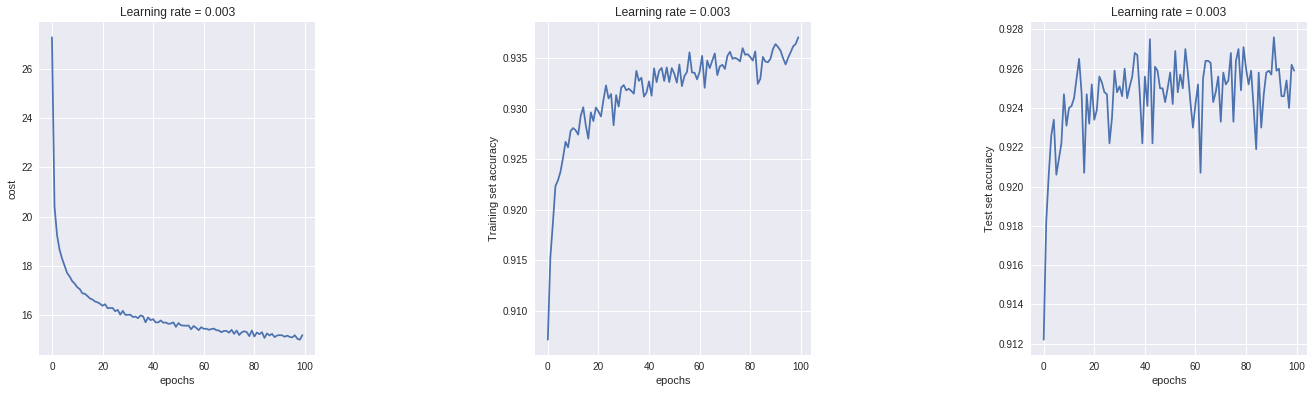

Parameters have been trained!

Final Accuracy:

Train Accuracy: 0.9370546
Test Accuracy: 0.9259


In [9]:
parameters = model(learning_rate = 0.003, num_epochs = 100, minibatch_size = 64)